In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
import pickle

In [56]:
df = pd.read_csv('/content/drive/MyDrive/archive (1)/2015.csv')

In [57]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [59]:
df.shape

(158, 12)

In [60]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [61]:
le=LabelEncoder()
df["Region"]=le.fit_transform(df["Region"])
df["Country"]=le.fit_transform(df["Country"])

In [62]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


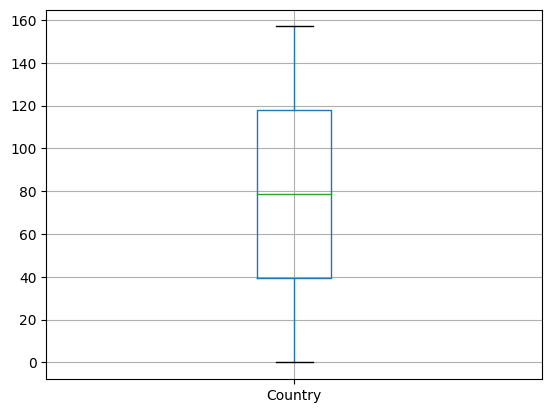

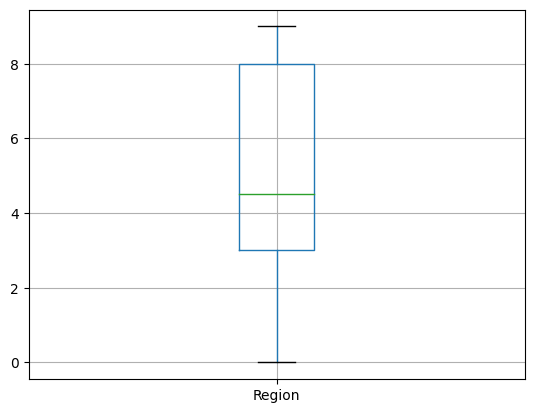

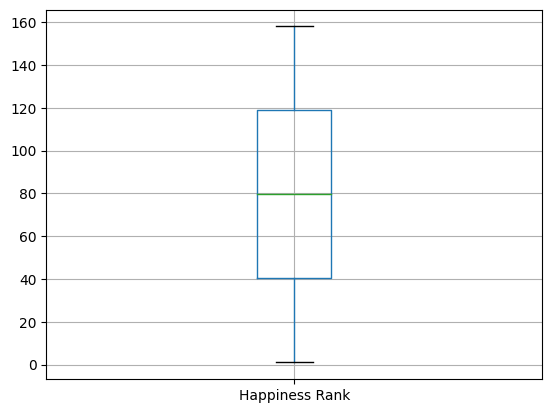

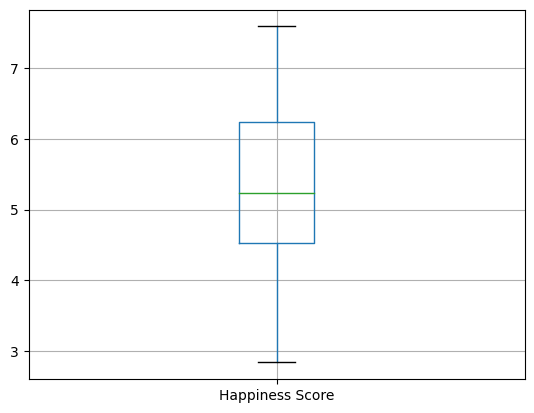

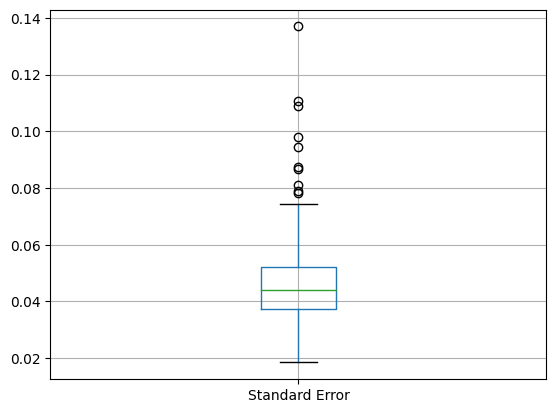

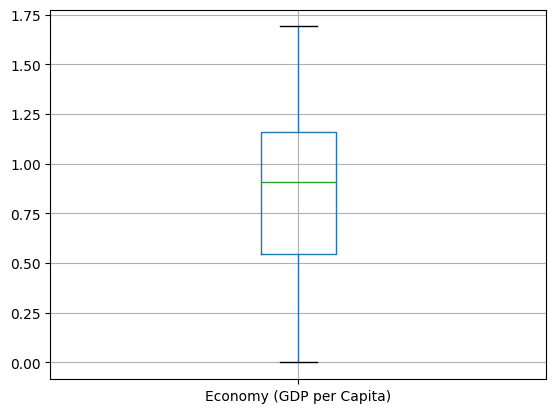

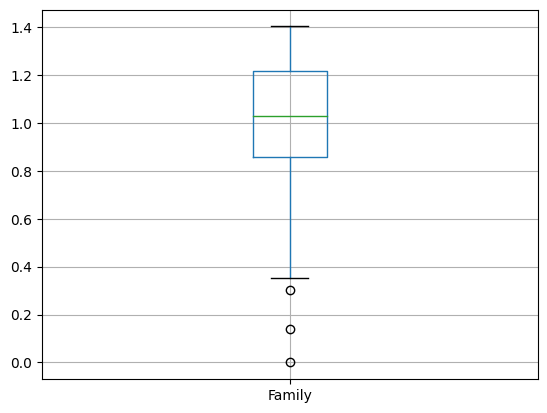

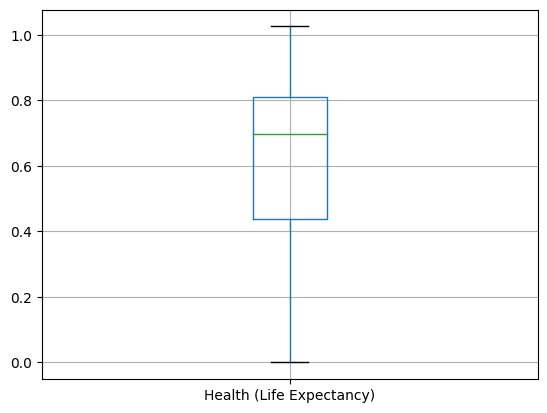

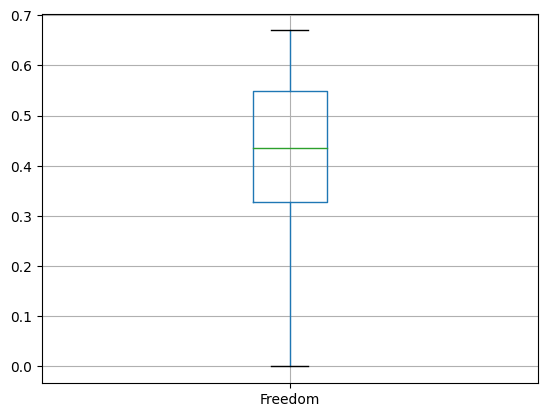

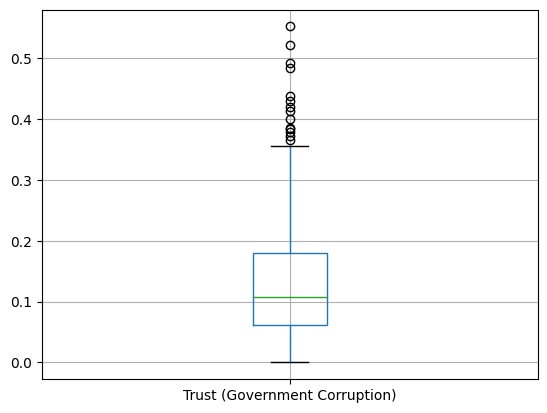

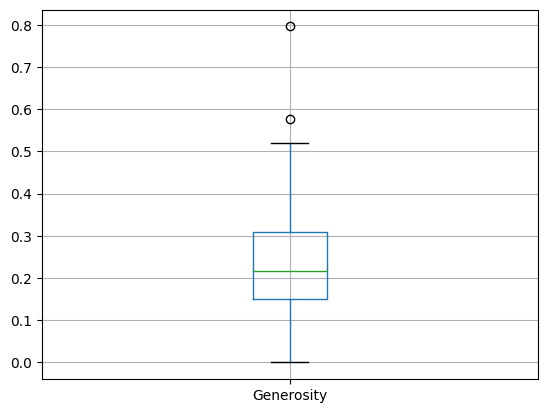

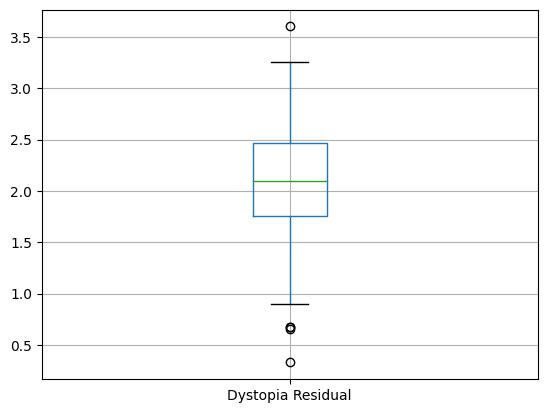

In [63]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [64]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


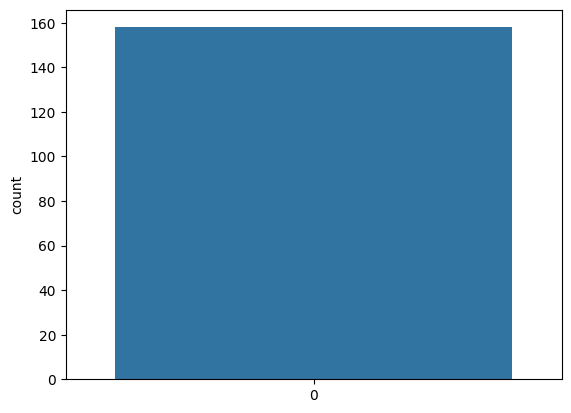

In [65]:
sns.countplot(df['Happiness Rank'])
plt.show()

<Axes: xlabel='Country', ylabel='Happiness Score'>

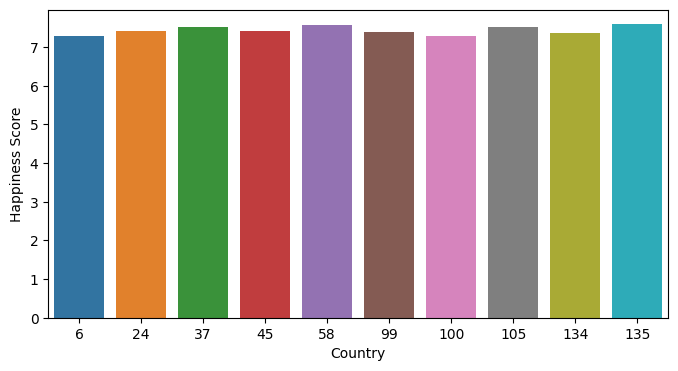

In [66]:
plt.figure(figsize=(8,4))
df_happiest = df.sort_values(by="Happiness Score",ascending=False).iloc[0:10,:]
sns.barplot(x="Country",y="Happiness Score",data=df_happiest)

In [67]:
# sns.pairplot(df)

In [68]:
X_scaled = df.drop("Happiness Score",axis=1)
y = df["Happiness Score"]

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42,test_size=0.2,shuffle=True)

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dtr = DecisionTreeRegressor(random_state=42)

In [73]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
y_train_pred=dtr.predict(X_train)
y_test_pred=dtr.predict(X_test)

In [75]:
r2_score(y_train,y_train_pred)*100

100.0

In [76]:
mean_squared_error(y_train,y_train_pred)

0.0

In [77]:
r2_score(y_test,y_test_pred)*100

99.47415223104173

In [78]:
mean_squared_error(y_test,y_test_pred)

0.007460468750000016

In [79]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)

In [80]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [81]:
y_train_pred=rfr.predict(X_train)
y_test_pred=rfr.predict(X_test)

In [82]:
xg_reg=xgb.XGBRegressor()

In [83]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
y_train_pred=xg_reg.predict(X_train)
y_test_pred=xg_reg.predict(X_test)

In [85]:
reg=LinearRegression()

In [86]:
reg.fit(X_train,y_train)

LinearRegression()

In [87]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [88]:
rfr.predict([[24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176]])

array([7.40539])

In [89]:
rfr.predict([[105,9,4,0.03880,1.45900,1.33095,0.90563,0.88521,0.66973,0.36503,2.46531]])

array([7.49711])

In [90]:
rfr.predict([[58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201]])

array([7.52714])

In [91]:
r2_score(y_test,y_test_pred)*100

99.99999479894784

In [92]:
r2_score(y_test,y_test_pred)*100

99.99999479894784

In [93]:
with open("Software Industry Salary Prediction.pkl","wb") as f:
  pickle.dump(rfr,f)

In [95]:
!pip install -U scikit-learn